### Example of DAISY dense image mathing with skimage 

In [1]:
from skimage.feature import daisy, match_descriptors, plot_matches, ORB
from skimage import data
from skimage.color import rgb2gray

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

#### Source images
We using two sample photos from stereo camera, converted to grayscale.

From here let's refer to them as "Left" and "Right".

Image size:(500, 741)


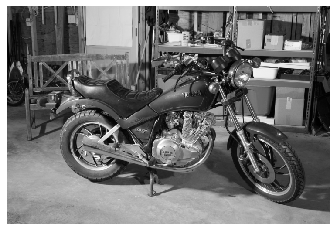

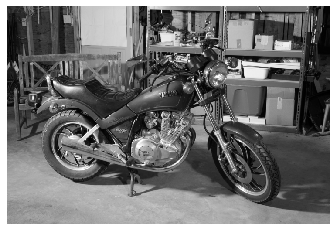

In [2]:
img_left, img_right, disp = data.stereo_motorcycle()

img_left = rgb2gray(img_left)
img_right = rgb2gray(img_right)

print(f'Image size:{img_left.shape}')
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(img_left, cmap=plt.cm.gray)
plt.show()
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(img_right, cmap=plt.cm.gray)
plt.show()

#### DAISY parametrization
DAISY is parametrized with following:
* radius $R$
* number of rings $Q$
* number of histograms in a ring $T$
* number of orientations (called "bins" in original paper) in each histogram $H$

#### Extracting DAISY descriptors
Extracting a limited set of DAISY descriptors from one of the images for illustrative purposes.
DAISY parameters are set to get some compromise between precision and computational complexity


In [3]:
R = 30
Q = 2
T = 6
H = 8
STEP = 60

In [16]:
import time
time1 = time.time()

descs_left, descs_img_left = daisy(img_left, step=STEP, radius=R, rings=Q, histograms=T,
                         orientations=H, visualize=True)

time2 = time.time()
print('Took {:.3f} ms'.format((time2-time1)*1000.0))

descs_right, descs_img_right = daisy(img_right, step=STEP, radius=R, rings=Q, histograms=T,
                         orientations=H, visualize=True)

Took 1203.065 ms


In [5]:
x, y, z = descs_left.shape
point_coordinates = np.zeros((x, y, 2))
for i in range(0, x):
    for j in range(0, y):
        point_coordinates[i][j] = [R + STEP * i, R + STEP * j]

#### Visualising extracted descriptors
Let's look how does it looks like for left image  

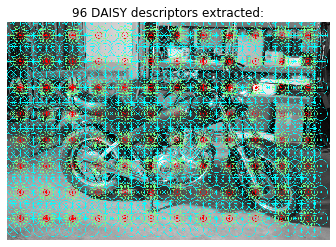

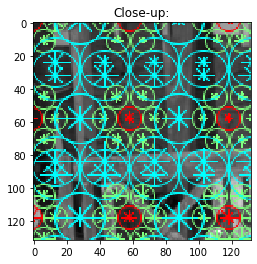

In [6]:
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img_left)
descs_num = descs_left.shape[0] * descs_left.shape[1]
ax.set_title(f'{descs_num} DAISY descriptors extracted:')
plt.show()

fig, ax = plt.subplots()
part = descs_img_left[32:164, 32:164]
ax.imshow(part)
ax.set_title('Close-up:')
plt.show()

Let's look at the descriptors that were found.

In [9]:
print(f'Results shape: {descs_left.shape}')
print(f'Single descriptor shape:\n {descs_left[0][0].shape}\n')
print(f'Single descriptor:\n {descs_left[0][0]}\n')
print(f'Descriptor norm: {np.linalg.norm(descs_left[0][0])}')
print(f'Sum:{np.sum(descs_left[0][0])}')

Results shape: (8, 12, 104)
Single descriptor shape:
 (104,)

Single descriptor:
 [0.00722687 0.00622266 0.00656535 0.01010971 0.01265091 0.0080368
 0.00513596 0.00535007 0.0126663  0.01188319 0.0127856  0.01644631
 0.0222396  0.0196376  0.01791941 0.0134682  0.00547753 0.0059566
 0.00888634 0.01348914 0.01790395 0.01122777 0.00678476 0.00526255
 0.00878304 0.00594502 0.00364134 0.00663846 0.01040179 0.00565772
 0.00250757 0.00477319 0.01468282 0.01088009 0.00690547 0.00639859
 0.00694357 0.00428627 0.00322551 0.00778712 0.00889081 0.00862589
 0.00755412 0.00715147 0.00727824 0.00532473 0.00412838 0.00553066
 0.00774512 0.00803382 0.00832089 0.0099186  0.01166091 0.0094547
 0.00744686 0.00638254 0.01861226 0.01484486 0.01153149 0.01390745
 0.01903906 0.01467929 0.01114506 0.01317343 0.009591   0.00806629
 0.00810499 0.01087393 0.01471068 0.00987871 0.00688386 0.00737427
 0.01502209 0.00853662 0.00463197 0.00980256 0.01604228 0.00825153
 0.00388302 0.00845839 0.01629485 0.0104517  0.005

#### Matching extracted descriptors
We can try to match extracted descriptors with standard skimage matchers. Firstly, we need to reshape descriptor arrays to two-dimensional

In [9]:
x, y, z = descs_left.shape
left_2d = descs_left.reshape((x*y, z))
right_2d = descs_right.reshape((x*y, z))
print(left_2d.shape)
print(right_2d.shape)

(96, 104)
(96, 104)


### Finding matches using skimage built-in descriptor matches
Now, using built-in skimage descriptor matcher, we can match sets for left and right images

In [10]:
matches = match_descriptors(left_2d, right_2d, metric='euclidean')

In [11]:
x, y, z = point_coordinates.shape
keypoints = point_coordinates.reshape((x*y, 2))

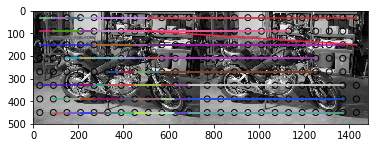

In [12]:
fig, ax = plt.subplots()
plot_matches(ax, img_left, img_right, keypoints, keypoints, matches)

As we can see, the output is not very informative. Let's try something different. Later.